### Required Packages

In [1]:
%pip install swig

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install gymnasium[box2d]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install renderlab

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
%pip uninstall moviepy

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install moviepy==1.0.3

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110769 sha256=369b7bd2d86302dfee57bfc5f79d3424dd2b628248615e9ef1ffefc33ef32029
  Stored in directory: c:\users\zikopis\appdata\local\pip\cache\wheels\96\32\2d\e10123bd88fbfc02fed53cc18c80a171d3c87479ed845fa7c1
Successfully built moviepy

  Attempting uninstall: decorator

    Found existing installation: decorator 5.2.1

    Uninstalling decorator-5.2.1:

   ---------------------------------------- 0/2 [decorator]
   ---------------------------------------- 0/2 [decorator]
   ---------------------------------------- 0/2 [decorator]
   ---------------------------------------- 0/2 [decorator]
   ---------------------------------------- 0/2 [decorator]
   ---------------------------------------- 0/2 [decorator]
   ---------------------------------------- 0/2 [decorator]
   ---------------------------------------- 0/

  DEPRECATION: Building 'moviepy' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'moviepy'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Basic Functions
- `step`: Run one timestep of the environment’s dynamics using the agent actions.
- `reset`: Resets the environment to an initial internal state, returning an initial observation and info.
- `render`: Compute the render frames as specified by render_mode during the initialization of the environment.

### Environment
**Action Space**

There are four discrete actions available:

- 0: do nothing
- 1: fire left orientation engine
- 2: fire main engine
- 3: fire right orientation engine

**Observation Space**

The state is an 8-dimensional vector:
[x, y, vx, vy, angle, angular_velocity, left_leg, right_leg]

**Rewards**

After every step a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode.

For each step, the reward:

- is increased/decreased the closer/further the lander is to the landing pad.
- is increased/decreased the slower/faster the lander is moving.
- is decreased the more the lander is tilted (angle not horizontal).
- is increased by 10 points for each leg that is in contact with the ground.
- is decreased by 0.03 points each frame a side engine is firing.
- is decreased by 0.3 points each frame the main engine is firing.

In [7]:
%pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Random Agent Test

In [ ]:
import gymnasium as gym
import numpy as np
import renderlab as rl
from gymnasium.wrappers import RecordVideo

env = gym.make(
    "LunarLander-v3",
    continuous=False,
    gravity=-10.0,
    enable_wind=False,
    wind_power=15.0,
    turbulence_power=1.5,
    render_mode="rgb_array",
)
env_init = RecordVideo(
    env,
    video_folder="videos/",
    name_prefix="random_agent",
    episode_trigger=lambda x: True,
)
scores = []

for ep in range(5):
    obs, info = env_init.reset()
    done = False
    total_reward = 0

    while not done:
        action = env_init.action_space.sample()
        obs, reward, terminated, truncated, info = env_init.step(action)
        total_reward += reward
        done = terminated or truncated

    scores.append(total_reward)
    print(f"Episode {ep + 1} reward:", total_reward)

env_init.close()
print("Mean score:", np.mean(scores))

Episode 1 reward: -158.61149100521774
Episode 2 reward: -91.16744842321465
Episode 3 reward: -130.56075846841586
Episode 4 reward: -99.0301389856432
Episode 5 reward: -19.999624857703736
Mean score: -99.87389234803905


In [19]:
%pip install stable-baselines3

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/111.0 MB ? eta -:--:--
   - -------------------------------------- 3.1/111.0 MB 16.8 MB/s eta 0:00:07
   --- ------------------------------------ 10.2/111.0 MB 26.6 MB/s eta 0:00:04
   ------ --------------------------------- 17.6/111.0 MB 29.1 MB/s eta 0:00:04
   ---------- ----------------------------- 27.8/111.0 MB 34.5 MB/s eta 0:00:03
   -------------- ------------------------- 39.1/111.0 MB 38.8 MB/s eta 0:00:02
   ------------------ --------------------- 50.9/111.0 MB 41.5 MB/s eta 0:00:02
   ---------------------- ----------------- 61.1/111.0 MB 42.8 MB/s eta 0:00:02
   -------------------------- ------------- 72.6/111.0 MB 44.5 MB/s eta 0:00:01
   ------------------------------ --------- 84.1/111.0 MB 45.9 MB/s eta 0:00:01
   ---------------------------------- ----- 95.4/111.0 MB 46.5 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### DQN & PPO

In [9]:
import time
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.evaluation import evaluate_policy
from gymnasium.wrappers import RecordVideo

# Wrap for DQN
env_dqn = RecordVideo(env, video_folder="videos/", name_prefix="dqn_eval")

# Wrap for PPO
env_ppo = RecordVideo(env, video_folder="videos/", name_prefix="ppo_eval")

start = time.time()
dqn = DQN("MlpPolicy", env_dqn, verbose=0)
dqn.learn(total_timesteps=10000)
dqn_time = time.time() - start

start = time.time()
ppo = PPO("MlpPolicy", env_ppo, verbose=0)
ppo.learn(total_timesteps=25000)
ppo_time = time.time() - start

DQN mean reward: -200.62401251643314
PPO mean reward: -395.06585271367805


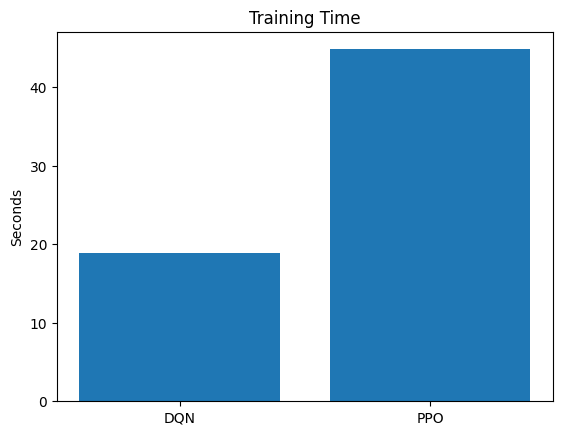

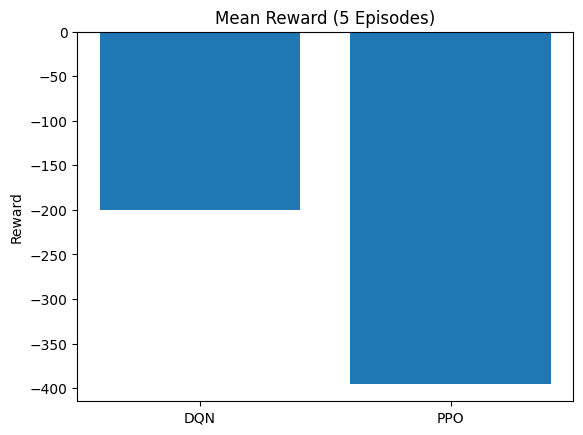

In [10]:
dqn_reward, _ = evaluate_policy(dqn, env_dqn, n_eval_episodes=5)
ppo_reward, _ = evaluate_policy(ppo, env_ppo, n_eval_episodes=5)

print("DQN mean reward:", dqn_reward)
print("PPO mean reward:", ppo_reward)

import matplotlib.pyplot as plt

plt.bar(["DQN", "PPO"], [dqn_time, ppo_time])
plt.title("Training Time")
plt.ylabel("Seconds")
plt.show()

plt.bar(["DQN", "PPO"], [dqn_reward, ppo_reward])
plt.title("Mean Reward (5 Episodes)")
plt.ylabel("Reward")
plt.show()


### Optimized DQN
- Small learning rate to avoid divergence
- Big buffer_size
- High gamma to propagate reward back
- Exploration factor that encourages early exploration and then exploitation
- Two hidden layers of 256 neurons each
- Best performance was observed for 500k total timesteps

In [11]:
dqn_opt = DQN(
    "MlpPolicy",
    env,
    learning_rate=5e-4,
    buffer_size=50_000,
    batch_size=128,
    gamma=0.99,
    exploration_fraction=0.15,
    target_update_interval=250,
    policy_kwargs=dict(net_arch=[256, 256]),
    verbose=1,
)

start = time.time()
dqn_opt.learn(total_timesteps=500_000)
dqn_time_opt = time.time() - start


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.5     |
|    ep_rew_mean      | -144     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1032     |
|    time_elapsed     | 0        |
|    total_timesteps  | 338      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 1.6      |
|    n_updates        | 59       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.8     |
|    ep_rew_mean      | -143     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1012     |
|    time_elapsed     | 0        |
|    total_timesteps  | 638      |
| train/              |        

### Optimized PPO
- Big steps to capture full episode trajectories
- High gamma as DQN to propagate landing reward
- Best performance was observed for 500k total timesteps

In [14]:
ppo_opt = PPO(
    "MlpPolicy",
    env,
    n_steps=2048,
    batch_size=128,
    learning_rate=3e-4,
    gamma=0.99,
    gae_lambda=0.95,
    policy_kwargs=dict(net_arch=[128, 128]),
    verbose=1,
    device="cuda",
)

start = time.time()
ppo_opt.learn(total_timesteps=500_000)
ppo_time_opt = time.time() - start

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 95.1     |
|    ep_rew_mean     | -166     |
| time/              |          |
|    fps             | 1225     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 95           |
|    ep_rew_mean          | -173         |
| time/                   |              |
|    fps                  | 1024         |
|    iterations           | 2            |
|    time_elapsed         | 3            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0047903615 |
|    clip_fraction        | 0.00337      |
|    clip_range           | 0.2          |
|    en

### Optimized DQN & PPO Comparison

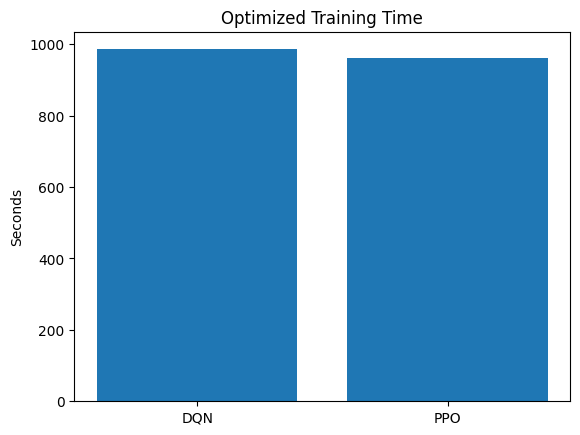

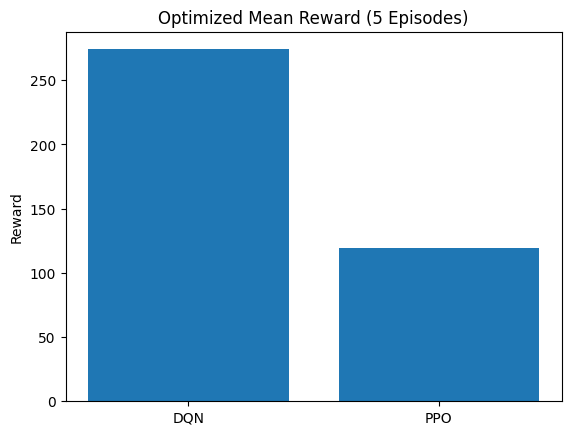


Optimized Results:

DQN Training Time: 985.79 sec
PPO Training Time: 960.01 sec

DQN Mean Reward: 274.1
PPO Mean Reward: 119.3



In [15]:
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy

test_env = gym.make("LunarLander-v3")

dqn_reward_opt, _ = evaluate_policy(dqn_opt, test_env, n_eval_episodes=5)
ppo_reward_opt, _ = evaluate_policy(ppo_opt, test_env, n_eval_episodes=5)

plt.bar(["DQN", "PPO"], [dqn_time_opt, ppo_time_opt])
plt.title("Optimized Training Time")
plt.ylabel("Seconds")
plt.show()

plt.bar(["DQN", "PPO"], [dqn_reward_opt, ppo_reward_opt])
plt.title("Optimized Mean Reward (5 Episodes)")
plt.ylabel("Reward")
plt.show()

print(f"""
Optimized Results:

DQN Training Time: {dqn_time_opt:.2f} sec
PPO Training Time: {ppo_time_opt:.2f} sec

DQN Mean Reward: {dqn_reward_opt:.1f}
PPO Mean Reward: {ppo_reward_opt:.1f}
""")
